# Project Final Code
Xavier Hummer, Jacob Kronlage, Ryan Perry    

---

In [1]:
# Import neccessary packages
from scipy.stats import norm
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import time

---
# Scraping and Cleaning

In [2]:
# Open initial Kaggle dataset into dataframe
initial_df = pd.read_csv('baseball.csv', encoding = 'utf-8')

# Confirm creation
initial_df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [3]:
# Identify all team abbreviations used in the dataset to help with mapping
initial_df['Team'].unique()

array(['ARI', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL',
       'DET', 'HOU', 'KCR', 'LAA', 'LAD', 'MIA', 'MIL', 'MIN', 'NYM',
       'NYY', 'OAK', 'PHI', 'PIT', 'SDP', 'SEA', 'SFG', 'STL', 'TBR',
       'TEX', 'TOR', 'WSN', 'FLA', 'TBD', 'ANA', 'MON', 'CAL', 'WSA',
       'SEP', 'KCA', 'MLN'], dtype=object)

In [4]:
# Identify current and historical team codes to create a new team name column
team_name_map = {
    'ARI': 'Arizona Diamondbacks',
    'ATL': 'Atlanta Braves',
    'BAL': 'Baltimore Orioles',
    'BOS': 'Boston Red Sox',
    'CHC': 'Chicago Cubs',
    'CIN': 'Cincinnati Reds',
    'CLE': 'Cleveland Indians',
    'COL': 'Colorado Rockies',
    'CHW': 'Chicago White Sox',
    'DET': 'Detroit Tigers',
    'FLA': 'Florida Marlins',
    'HOU': 'Houston Astros',
    'KCR': 'Kansas City Royals',
    'LAA': 'Los Angeles Angels',
    'LAD': 'Los Angeles Dodgers',
    'MIA': 'Miami Marlins',
    'MIL': 'Milwaukee Brewers',
    'MIN': 'Minnesota Twins',
    'MON': 'Montreal Expos',
    'NYM': 'New York Mets',
    'NYY': 'New York Yankees',
    'OAK': 'Oakland Athletics',
    'PHI': 'Philadelphia Phillies',
    'PIT': 'Pittsburgh Pirates',
    'SDP': 'San Diego Padres',
    'SEA': 'Seattle Mariners',
    'SFG': 'San Francisco Giants',
    'STL': 'St. Louis Cardinals',
    'TBR': 'Tampa Bay Rays',
    'TEX': 'Texas Rangers',
    'TOR': 'Toronto Blue Jays',
    'WSN': 'Washington Nationals',
    'FLA': 'Florida Marlins',        
    'TBD': 'Tampa Bay Devil Rays',   
    'ANA': 'Anaheim Angels',         
    'MON': 'Montreal Expos',         
    'CAL': 'California Angels',      
    'WSA': 'Washington Senators',    
    'SEP': 'Seattle Pilots',         
    'KCA': 'Kansas City Athletics',  
    'MLN': 'Milwaukee Braves'      
}

In [5]:
# Create the new column using the 'Team' column and mapping list
initial_df['Team Name'] = initial_df['Team'].map(team_name_map)
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,Chicago Cubs


In [6]:
# Drop columns that are not useful for our research questions
initial_df.drop(['RankSeason','OOBP', 'OSLG'], axis = 1, inplace = True)
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankPlayoffs,G,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,162,Chicago Cubs


In [7]:
# Change binary logic 0 and 1 values to 'No' and 'Yes' for whether teams made the playoffs
initial_df['Playoffs'] = initial_df['Playoffs'].astype('object') # Change data type
initial_df['Playoffs'] = initial_df['Playoffs'].map({1: 'Yes', 0: 'No'}).astype('object')
initial_df.head(5)

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankPlayoffs,G,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,NaN,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,NaN,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,NaN,162,Chicago Cubs


In [8]:
# Rename columns to make the data easier to digest
initial_df = initial_df.rename(columns = {
    'RankPlayoffs': 'PlayoffsFinish',
    'W': 'Wins',
    'G': 'Games'
    
})

In [9]:
# Replace NaN values for column with blanks
initial_df['PlayoffsFinish'] = initial_df['PlayoffsFinish'].replace(np.nan, "")
initial_df

,Team,League,Year,RS,RA,Wins,OBP,SLG,BA,Playoffs,PlayoffsFinish,Games,Team Name
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,,162,Arizona Diamondbacks
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,,162,Boston Red Sox
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,,162,Chicago Cubs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,No,,161,Philadelphia Phillies
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,No,,161,Pittsburgh Pirates
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,Yes,2.0,165,San Francisco Giants
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,No,,163,St. Louis Cardinals


In [10]:
# Confirm there are is now no missing data in the dataframe
initial_df.isna().sum()

Team              0
League            0
Year              0
RS                0
RA                0
Wins              0
OBP               0
SLG               0
BA                0
Playoffs          0
PlayoffsFinish    0
Games             0
Team Name         0
dtype: int64

In [11]:
# Evaluate how the data is stored in each column
initial_df.dtypes

Team               object
League             object
Year                int64
RS                  int64
RA                  int64
Wins                int64
OBP               float64
SLG               float64
BA                float64
Playoffs           object
PlayoffsFinish     object
Games               int64
Team Name          object
dtype: object

In [12]:
# Set up Chrome
options = Options()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Create lists to later append
tm = []
hr = []
yr = []

# Loop through years 1962-2012
for year in range(1962, 2013):
    
    # Load the page
    url = f"https://www.baseball-reference.com/leagues/majors/{year}.shtml"
    driver.get(url)
    time.sleep(3)

    # Find the table
    table = driver.find_element(By.ID, "teams_standard_batting")
    rows = table.find_elements(By.TAG_NAME, "tr")

    # Create a loop and append to lists
    for row in rows[1:]:
        records = row.find_elements(By.TAG_NAME, "td")
        
        if len(records) > 0:
            team_name = row.find_element(By.TAG_NAME, "th").text
            home_runs = records[10].text
            if team_name != "" and "League Average" not in team_name:
                tm.append(team_name)
                hr.append(home_runs)
                yr.append(year)

# Load scrapped data into a Pandas dataframe
homerun_df = pd.DataFrame({
    'Team Name': tm,
    'Home Runs': hr,
    'Year': yr
})

# Convert 'Home Runs' column type to numeric
homerun_df['Home Runs'] = pd.to_numeric(homerun_df['Home Runs'], errors='coerce')

# Display dataframe
homerun_df

,Team Name,Home Runs,Year
0,Baltimore Orioles,156,1962
1,Boston Red Sox,146,1962
2,Chicago Cubs,126,1962
3,Chicago White Sox,92,1962
4,Cincinnati Reds,167,1962
...,...,...,...
1333,St. Louis Cardinals,159,2012
1334,Tampa Bay Rays,175,2012
1335,Texas Rangers,200,2012
1336,Toronto Blue Jays,198,2012


In [13]:
# Save raw data to a CSV file
homerun_df.to_csv('homerun_df.csv', index = False)

In [14]:
# Remove years that are not included in our analysis
homerun_df = homerun_df[
    (homerun_df['Year'] != 1972) &
    (homerun_df['Year'] != 1981) &
    (homerun_df['Year'] != 1994) &
    (homerun_df['Year'] != 1995)
    
]

In [15]:
# Rename the team to match the initial data
homerun_df['Team Name'] = homerun_df['Team Name'].replace({
    'Los Angeles Angels of Anaheim': 'Los Angeles Angels'
})

homerun_df['Team Name'] = homerun_df['Team Name'].replace('Houston Colt .45s', 'Houston Astros')

/var/folders/8v/j4myjvjj3yxf252l5ln82f540000gn/T/ipykernel_21411/1073004460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homerun_df['Team Name'] = homerun_df['Team Name'].replace({
/var/folders/8v/j4myjvjj3yxf252l5ln82f540000gn/T/ipykernel_21411/1073004460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homerun_df['Team Name'] = homerun_df['Team Name'].replace('Houston Colt .45s', 'Houston Astros')


In [16]:
# Check number of records matches records in initial dataset
homerun_df.shape

(1232, 3)

In [17]:
# Merge the scrapped data onto the initial dataframe from Kaggle
final_initial = pd.merge(initial_df, homerun_df, on = ['Team Name','Year'], how = 'left')
final_initial

,Team,League,Year,RS,RA,Wins,OBP,SLG,BA,Playoffs,PlayoffsFinish,Games,Team Name,Home Runs
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,No,,162,Arizona Diamondbacks,165
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,Yes,5.0,162,Atlanta Braves,149
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,Yes,4.0,162,Baltimore Orioles,214
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,No,,162,Boston Red Sox,165
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,No,,162,Chicago Cubs,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,No,,161,Philadelphia Phillies,142
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,No,,161,Pittsburgh Pirates,108
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,Yes,2.0,165,San Francisco Giants,204
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,No,,163,St. Louis Cardinals,137


In [18]:
# Rename the columns for better readability
final_initial = final_initial[['Team', 'Team Name', 'League', 'Year',
                               'Games', 'Wins', 'Home Runs', 'RS', 'RA', 'OBP', 'SLG',
                               'BA', 'Playoffs', 'PlayoffsFinish' ]]
final_initial

,Team,Team Name,League,Year,Games,Wins,Home Runs,RS,RA,OBP,SLG,BA,Playoffs,PlayoffsFinish
0,ARI,Arizona Diamondbacks,NL,2012,162,81,165,734,688,0.328,0.418,0.259,No,
1,ATL,Atlanta Braves,NL,2012,162,94,149,700,600,0.320,0.389,0.247,Yes,5.0
2,BAL,Baltimore Orioles,AL,2012,162,93,214,712,705,0.311,0.417,0.247,Yes,4.0
3,BOS,Boston Red Sox,AL,2012,162,69,165,734,806,0.315,0.415,0.260,No,
4,CHC,Chicago Cubs,NL,2012,162,61,137,613,759,0.302,0.378,0.240,No,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,Philadelphia Phillies,NL,1962,161,81,142,705,759,0.330,0.390,0.260,No,
1228,PIT,Pittsburgh Pirates,NL,1962,161,93,108,706,626,0.321,0.394,0.268,No,
1229,SFG,San Francisco Giants,NL,1962,165,103,204,878,690,0.341,0.441,0.278,Yes,2.0
1230,STL,St. Louis Cardinals,NL,1962,163,84,137,774,664,0.335,0.394,0.271,No,


In [19]:
# Save the transformed datasets within the merged dataframe into a .csv file
final_initial.to_csv('project_proposal_dataset.csv', header = True, index = False, encoding = 'utf-8')

In [20]:
# Set up Chrome
options = Options()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Create lists to collect data
team_list = []
year_list = []
attendance_list = []

# Loop through each year from 1962 to 2012
for year in range(1962, 2013):
    print("Scraping:", year)
    url = f"https://www.thebaseballcube.com/content/mlb_att_year/{year}"
    driver.get(url)
    time.sleep(3)  # Wait for the page to load
    
    # Find the table and rows
    table = driver.find_element(By.TAG_NAME, "table")
    rows = table.find_elements(By.TAG_NAME, "tr")
    
    # Loop through the rows, skip the header
    for row in rows[1:]:
        cells = row.find_elements(By.TAG_NAME, "td")

        if len(cells) >= 5: # Check cells have values
            team = cells[0].text
            att = cells[2].text.replace(',', '')  

            if team != "" and "League Total" not in team and att.isdigit(): # Check team record is not blank and also not League Total
                team_list.append(team)
                year_list.append(year)
                attendance_list.append(int(att))

Scraping: 1962
Scraping: 1963
Scraping: 1964
Scraping: 1965
Scraping: 1966
Scraping: 1967
Scraping: 1968
Scraping: 1969
Scraping: 1970
Scraping: 1971
Scraping: 1972
Scraping: 1973
Scraping: 1974
Scraping: 1975
Scraping: 1976
Scraping: 1977
Scraping: 1978
Scraping: 1979
Scraping: 1980
Scraping: 1981
Scraping: 1982
Scraping: 1983
Scraping: 1984
Scraping: 1985
Scraping: 1986
Scraping: 1987
Scraping: 1988
Scraping: 1989
Scraping: 1990
Scraping: 1991
Scraping: 1992
Scraping: 1993
Scraping: 1994
Scraping: 1995
Scraping: 1996
Scraping: 1997
Scraping: 1998
Scraping: 1999
Scraping: 2000
Scraping: 2001
Scraping: 2002
Scraping: 2003
Scraping: 2004
Scraping: 2005
Scraping: 2006
Scraping: 2007
Scraping: 2008
Scraping: 2009
Scraping: 2010
Scraping: 2011
Scraping: 2012


In [22]:
# Create a dataframe from the scraped data containing attendance data
attendance_df = pd.DataFrame({
    "Team Name": team_list,
    "Year": year_list,
    "Total Home Attendance": attendance_list
})

# Display dataframe
display(attendance_df)

,Team Name,Year,Total Home Attendance
0,Baltimore Orioles,1962,795590
1,Boston Red Sox,1962,723710
2,Chicago Cubs,1962,593068
3,Chicago White Sox,1962,1131562
4,Cincinnati Reds,1962,981890
...,...,...,...
1333,Texas Rangers,2012,3460280
1334,Toronto Blue Jays,2012,2099663
1335,Washington Nationals,2012,2370794
1336,Miami Marlins,2012,2219444


In [23]:
# Save raw data to a CSV file
attendance_df.to_csv('attendance_df.csv', index = False)

In [24]:
# Remove years that are not included in our analysis
attendance_df = attendance_df[
    (attendance_df['Year'] != 1972) &
    (attendance_df['Year'] != 1981) &
    (attendance_df['Year'] != 1994) &
    (attendance_df['Year'] != 1995)
    
]

In [25]:
# Fix team name in the attendance dataset
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Washington Senators II', 'Washington Senators')
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Houston Colt 45s', 'Houston Astros')
attendance_df['Team Name'] = attendance_df['Team Name'].replace('Los Angeles Angels of Anaheim', 'Los Angeles Angels')

In [26]:
# Confirm number of records in dataframe matches records in main dataset
attendance_df.shape

(1232, 3)

We have 1,232 records in both the attendance dataset and our main dataset, which confirms that we can vertically merge them without introducing any missing (NA) values.

In [27]:
# Merge the scrapped data onto the dataset
checkin_df = pd.merge(final_initial, attendance_df, on = ['Team Name','Year'], how = 'left')
checkin_df

,Team,Team Name,League,Year,Games,Wins,Home Runs,RS,RA,OBP,SLG,BA,Playoffs,PlayoffsFinish,Total Home Attendance
0,ARI,Arizona Diamondbacks,NL,2012,162,81,165,734,688,0.328,0.418,0.259,No,,2177617
1,ATL,Atlanta Braves,NL,2012,162,94,149,700,600,0.320,0.389,0.247,Yes,5.0,2420171
2,BAL,Baltimore Orioles,AL,2012,162,93,214,712,705,0.311,0.417,0.247,Yes,4.0,2102240
3,BOS,Boston Red Sox,AL,2012,162,69,165,734,806,0.315,0.415,0.260,No,,3043003
4,CHC,Chicago Cubs,NL,2012,162,61,137,613,759,0.302,0.378,0.240,No,,2882756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,Philadelphia Phillies,NL,1962,161,81,142,705,759,0.330,0.390,0.260,No,,762169
1228,PIT,Pittsburgh Pirates,NL,1962,161,93,108,706,626,0.321,0.394,0.268,No,,1071614
1229,SFG,San Francisco Giants,NL,1962,165,103,204,878,690,0.341,0.441,0.278,Yes,2.0,1590136
1230,STL,St. Louis Cardinals,NL,1962,163,84,137,774,664,0.335,0.394,0.271,No,,938516


In [28]:
# Check for NAs
checkin_df.isna().sum()

Team                     0
Team Name                0
League                   0
Year                     0
Games                    0
Wins                     0
Home Runs                0
RS                       0
RA                       0
OBP                      0
SLG                      0
BA                       0
Playoffs                 0
PlayoffsFinish           0
Total Home Attendance    0
dtype: int64

---
# Correlation Analysis

In [29]:
# Run a correlation between wins and the numeric statistics we have collected 
stats_df = checkin_df.select_dtypes(include = 'number')

# Create a correlation matrix
corr_matrix = stats_df.corr()

# Sort correlation matrix by wins
corr_on_wins = corr_matrix['Wins'].drop(['Wins', 'Year', 'Games']).sort_values(ascending = False)

# Convert to DataFrame
corr_df = corr_on_wins.reset_index()
corr_df.columns = ['Feature', 'Correlation with Wins']

# Display correlation values
display(corr_df)

,Feature,Correlation with Wins
0,RS,0.511745
1,OBP,0.481836
2,BA,0.408716
3,SLG,0.401496
4,Total Home Attendance,0.401462
5,Home Runs,0.315769
6,RA,-0.532394


Runs Scored, On-Base Percentage, Batting Average, Slugging Percentage, Total Home Attendance, Home Runs, and Runs Allowed all show weak to moderate correlation with Wins. Runs Allowed is the only feature with a negative moderate correlation, which is expected.

---
# Visualizations

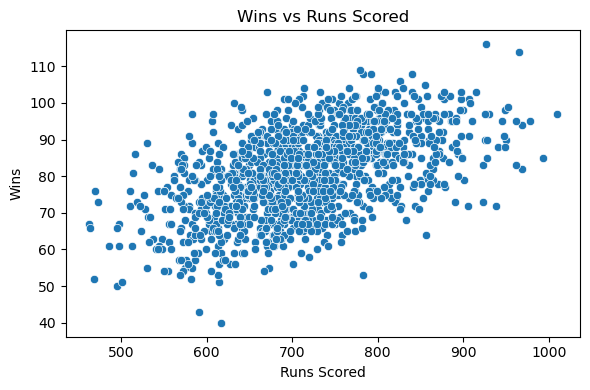

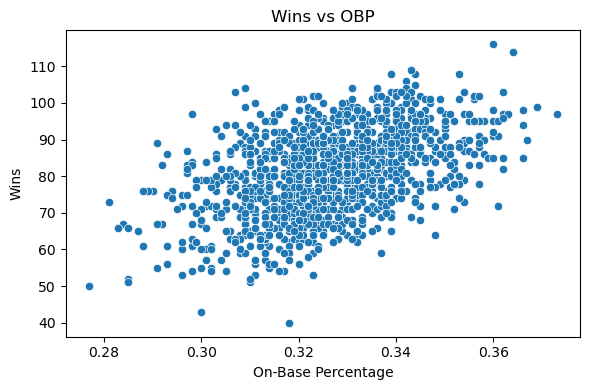

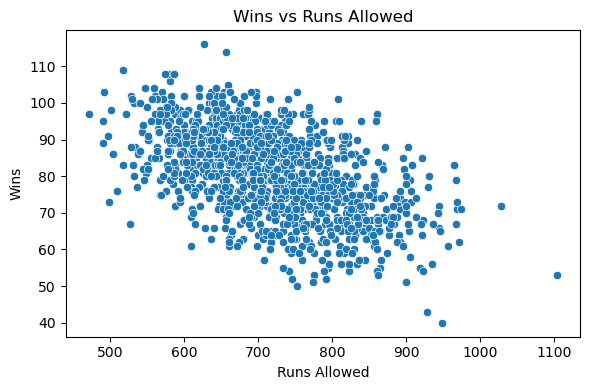

In [30]:
# Visualize the correlations using scatterplots

# Scatterplot 1: Wins vs Runs Scored
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'RS', y = 'Wins', data = checkin_df)
plt.title('Wins vs Runs Scored')
plt.xlabel('Runs Scored')
plt.ylabel('Wins')
plt.tight_layout()
plt.show()

# Scatterplot 2: Wins vs OBP
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'OBP', y = 'Wins', data = checkin_df)
plt.title('Wins vs OBP')
plt.xlabel('On-Base Percentage')
plt.ylabel('Wins')
plt.tight_layout()
plt.show()

# Scatterplot 3: Wins vs Runs Allowed
plt.figure(figsize = (6, 4))
sns.scatterplot(x = 'RA', y = 'Wins', data = checkin_df)
plt.title('Wins vs Runs Allowed')
plt.xlabel('Runs Allowed')
plt.ylabel('Wins')
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


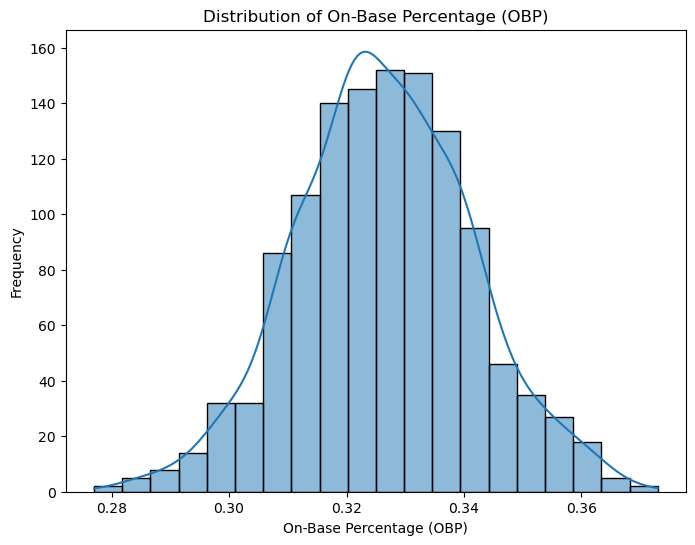

Mean OBP: 0.32633116883116886
Median OBP: 0.326
Standard Deviation OBP: 0.01501277233416599


In [31]:
# Univariate Analysis

# Create a plot that shows the distribution of OBP
plt.figure(figsize=(8,6))
sns.histplot(checkin_df['OBP'], kde=True, bins=20)
plt.title('Distribution of On-Base Percentage (OBP)')
plt.xlabel('On-Base Percentage (OBP)')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics
print('Mean OBP:', checkin_df['OBP'].mean())
print('Median OBP:', checkin_df['OBP'].median())
print('Standard Deviation OBP:', checkin_df['OBP'].std())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


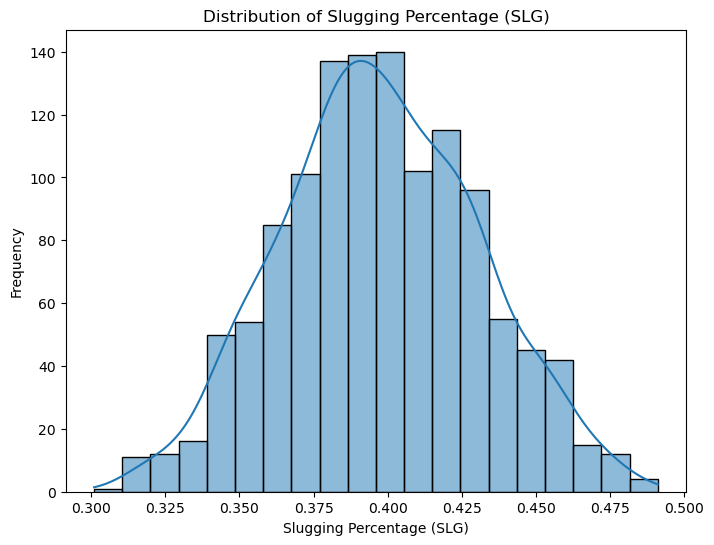

Mean SLG: 0.39734172077922075
Median SLG: 0.396
Standard Deviation SLG: 0.033266898621737706


In [32]:
# Create a plot that shows the distribution of SLG

plt.figure(figsize=(8,6))
sns.histplot(checkin_df['SLG'], kde=True, bins=20)
plt.title('Distribution of Slugging Percentage (SLG)')
plt.xlabel('Slugging Percentage (SLG)')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics
print('Mean SLG:', checkin_df['SLG'].mean())
print('Median SLG:', checkin_df['SLG'].median())
print('Standard Deviation SLG:', checkin_df['SLG'].std())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


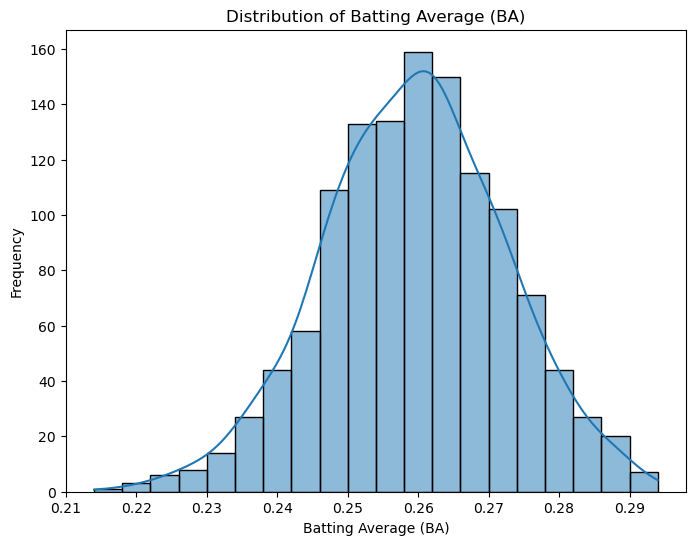

Mean BA: 0.25927272727272727
Median BA: 0.26
Standard Deviation BA: 0.012907228928000327


In [33]:
# Create a plot that shows the distribution of BA

plt.figure(figsize=(8,6))
sns.histplot(checkin_df['BA'], kde=True, bins=20)
plt.title('Distribution of Batting Average (BA)')
plt.xlabel('Batting Average (BA)')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics
print('Mean BA:', checkin_df['BA'].mean())
print('Median BA:', checkin_df['BA'].median())
print('Standard Deviation BA:', checkin_df['BA'].std())

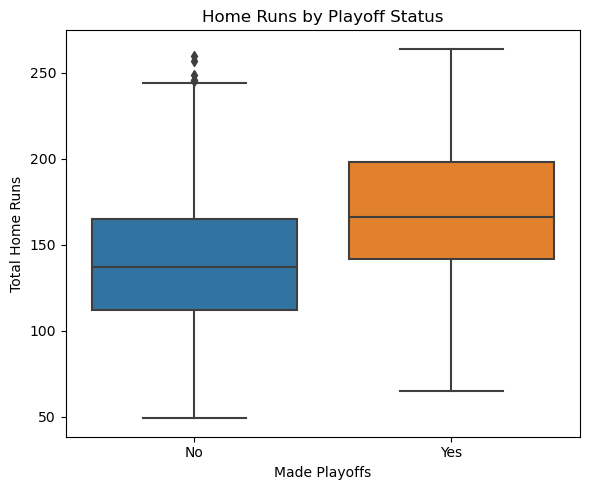

In [34]:
# Box Plot 1: Home Runs by Playoffs (Y/N)
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'Playoffs', y = 'Home Runs', data = checkin_df)

# Assign respective labels
plt.title('Home Runs by Playoff Status')
plt.xlabel('Made Playoffs')
plt.ylabel('Total Home Runs')
plt.tight_layout()
plt.show()

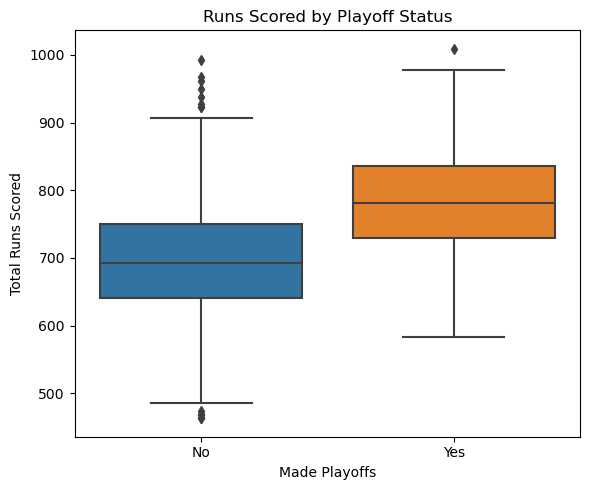

In [35]:
# Box Plot 2: Total Runs Scored by Playoffs (Y/N)
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'Playoffs', y = 'RS', data = checkin_df)

# Assign respective labels
plt.title('Runs Scored by Playoff Status')
plt.xlabel('Made Playoffs')
plt.ylabel('Total Runs Scored')
plt.tight_layout()
plt.show()

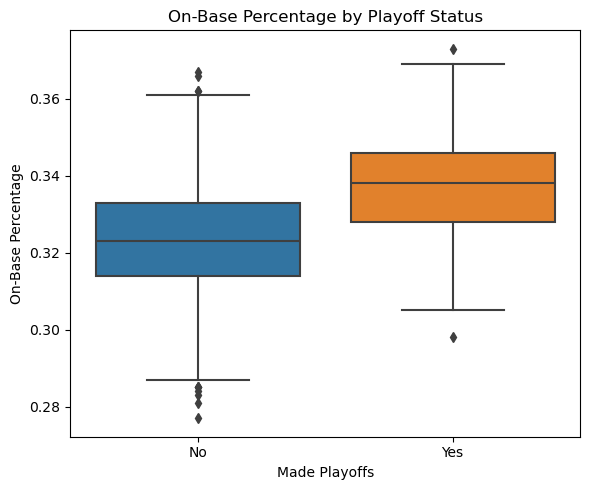

In [36]:
# Box Plot 3: On-Base Percentage by Playoffs (Y/N)
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'Playoffs', y = 'OBP', data = checkin_df)

# Assign respective labels
plt.title('On-Base Percentage by Playoff Status')
plt.xlabel('Made Playoffs')
plt.ylabel('On-Base Percentage')
plt.tight_layout()
plt.show()

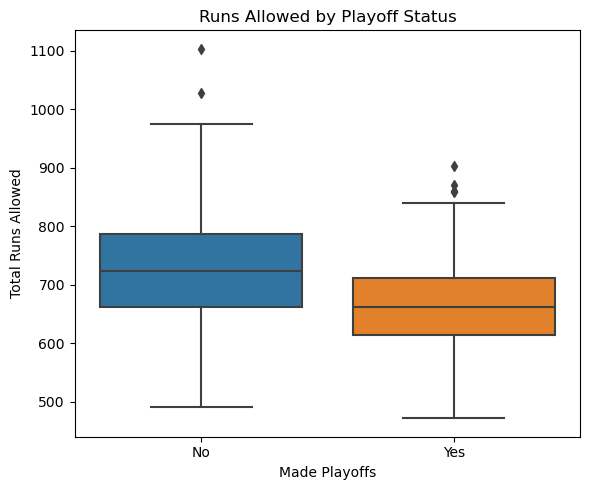

In [37]:
# Box Plot 4: Total Runs Allowed by Playoffs (Y/N)
plt.figure(figsize = (6, 5))
sns.boxplot(x = 'Playoffs', y = 'RA', data = checkin_df)

# Assign respective labels
plt.title('Runs Allowed by Playoff Status')
plt.xlabel('Made Playoffs')
plt.ylabel('Total Runs Allowed')
plt.tight_layout()
plt.show()

/var/folders/8v/j4myjvjj3yxf252l5ln82f540000gn/T/ipykernel_21411/3072211852.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_wins = checkin_df.groupby('Attendance Bin')['Wins'].mean()


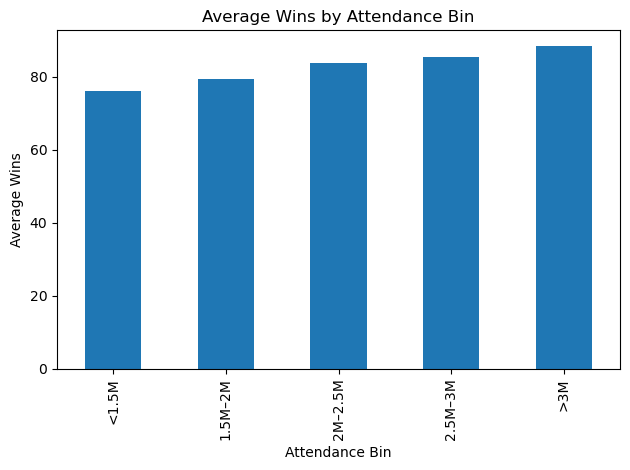

In [38]:
# Create bins
bins = [0, 1500000, 2000000, 2500000, 3000000, float('inf')]
labels = ['<1.5M', '1.5M–2M', '2M–2.5M', '2.5M–3M', '>3M']

# Create new column
checkin_df['Attendance Bin'] = pd.cut(checkin_df['Total Home Attendance'], bins = bins, labels = labels)

# Calculate average wins in each attendance bin using .groupby function
avg_wins = checkin_df.groupby('Attendance Bin')['Wins'].mean()

# Plot the calculations
avg_wins.plot(kind = 'bar', ylabel = 'Average Wins', title = 'Average Wins by Attendance Bin')
plt.tight_layout()
plt.show()

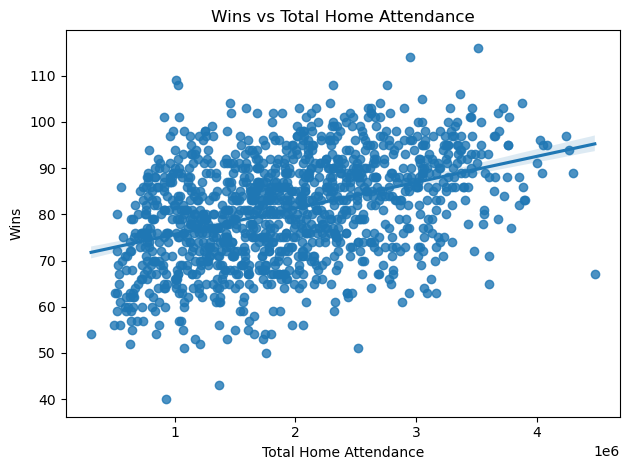

In [39]:
# Create a scatterplot with a trend line for wins and total home attendance
sns.regplot(x = 'Total Home Attendance', y = 'Wins', data = checkin_df)

# Assign respective labels
plt.title('Wins vs Total Home Attendance')
plt.xlabel('Total Home Attendance')
plt.ylabel('Wins')
plt.tight_layout()
plt.show()

---
# Hypothesis Testing

In [40]:
# Hypothesis z-Test

# Separate groups
playoff_hr = checkin_df[checkin_df['Playoffs'] == 'Yes']['Home Runs'].dropna()
non_playoff_hr = checkin_df[checkin_df['Playoffs'] == 'No']['Home Runs'].dropna()

# Sample statistics
mean1 = playoff_hr.mean()
mean2 = non_playoff_hr.mean()
std1 = playoff_hr.std()
std2 = non_playoff_hr.std()
n1 = len(playoff_hr)
n2 = len(non_playoff_hr)

# Standard error
se = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Z-statistic calculation
z_stat = (mean1 - mean2) / se

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Print results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Print explanation
if p_value < 0.05:
    print("Result: Statistically significant difference in Home Runs between playoff and non-playoff teams.")
else:
    print("Result: No statistically significant difference in Home Runs between playoff and non-playoff teams.")

Z-statistic: 9.823165656488838
P-value: 0.0
Result: Statistically significant difference in Home Runs between playoff and non-playoff teams.


---
# Machine Learning Models

In [41]:
# Convert 'Playoffs' to binary: Yes = 1, No = 0
checkin_df['Playoffs_binary'] = checkin_df['Playoffs'].map({'Yes': 1, 'No': 0})

# Define features
features = ['Home Runs', 'RS', 'OBP', 'BA', 'SLG', 'Total Home Attendance', 'RA']

# Drop rows with missing values
X = checkin_df[features].dropna()
y = checkin_df.loc[X.index, 'Playoffs_binary']

# Fit logistic regression model
LogReg = LogisticRegression(max_iter = 1000)
LogReg.fit(X, y)

# Predict playoff outcomes
y_pred = LogReg.predict(X)

# Output classification performance
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       988
           1       0.76      0.66      0.70       244

    accuracy                           0.89      1232
   macro avg       0.84      0.80      0.82      1232
weighted avg       0.89      0.89      0.89      1232



In [42]:
# Assign features and target variable
X = checkin_df[['Home Runs', 'RS', 'OBP', 'BA', 'SLG', 'Total Home Attendance', 'RA']]
y = checkin_df['Wins']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Fit model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# Predict and evaluate
y_pred = LinReg.predict(X_test)

print('Linear Regression Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Linear Regression R-squared:', r2_score(y_test, y_pred))

# Coefficients with standardized features
coefficients = pd.DataFrame({'Feature': X.columns, 'Standardized Coefficient': LinReg.coef_})
print(coefficients)

Linear Regression Mean Squared Error: 16.3403313860911
Linear Regression R-squared: 0.8677921412246488
                 Feature  Standardized Coefficient
0              Home Runs                  1.476108
1                     RS                  8.636073
2                    OBP                  0.635256
3                     BA                  0.692820
4                    SLG                 -1.657346
5  Total Home Attendance                  0.475627
6                     RA                 -9.766077


In [43]:
# Assign features and target variable
X = checkin_df[['Home Runs', 'RS', 'OBP', 'BA', 'SLG', 'Total Home Attendance', 'RA']]
y = checkin_df['Wins']

# Initialize and fit model
dectree = DecisionTreeRegressor(max_depth = 4, random_state = 42)
dectree.fit(X_train, y_train)

# Predict and evaluate
y_pred = dectree.predict(X_test)
print('Decision Tree Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Decision Tree R-squared:', r2_score(y_test, y_pred))

Decision Tree Mean Squared Error: 32.09063181433019
Decision Tree R-squared: 0.7403581592884898


In [44]:
# Drop the 'Playoff_binary' column
checkin_df.drop(columns = ['Playoffs_binary'], inplace = True)

In [45]:
# Save the final version of the dataframe to a CSV file
checkin_df.to_csv('final_project_dataset.csv', index = False)